<a href="https://colab.research.google.com/github/LorettaLetter/IC/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
'''
Implementação do k-means sobre o iris-databse

'''
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split  # Função para dividir dados em treino e teste
from sklearn.preprocessing import StandardScaler  # Ferramenta para normalização dos dados
from sklearn.metrics import accuracy_score  # Função para calcular a acurácia de modelos

'''Quick_sort'''
def quicksort(arr, left, right):
    if left < right:
        partition_pos = partition(arr, left, right)
        quicksort(arr, left, partition_pos - 1)
        quicksort(arr, partition_pos + 1, right)

def partition(arr, left, right):
    i = left
    j = right -1
    pivot = arr[right]

    while i < j:
        while i < right and arr[i] < pivot:
            i += 1

        while j > left and arr[j] >= pivot:
            j -= 1

        if i < j:
            arr[i], arr[j] = arr[j], arr[i]

    if arr[i] > pivot:
        arr[i], arr[right] = arr[right], arr[i]

    return i

''' PASSO 1 - selecionar o número de classes que terá em seus dados.'''

#Vamos usar o database de iris como exemplo. Como ele possui 3 diferentes classes de plantas, faremos k=3
iris = datasets.load_iris()
k = 3

#Vamos separar os dados e classes -  Nesse caso, aplicaremos o k-means apenas nas sépalas para facilitar - coluna 0 = sepal lenght, coluna 1 = sepal width
dados = iris["data"] # pegamos apenas os dados relacionados aos atributos - esse seria a matriz dos nossos
dados = dados[:,2:] # pois queremos apenas os dados das pétalas (podemos fazer exatamente o mesmo, só que para as sépalas)
y = iris["target"] # aqui, pegamos todas as classes, na qual possui relação com cada linha de atributos da nossa array de dados

# Vamos separar nossos dados em dados de treino e dados de teste.
dados_train, dados_test, y_train, y_test = train_test_split(dados, y, test_size=0.2, random_state=42) # train_test_split separa nossas matrizes dados e y na parte de teste e treino
y_train = y_train.astype(float) # definindo as classes como números reais ao invés de inteiros
y_test = y_test.astype(float)

# Tratando os dados para realizar uma separação mais precisa
scaler = StandardScaler()  # Inicializa o objeto StandardScaler
#dados_train = scaler.fit(dados_train) # só calcula o desvio padrão e média do dados_train como z-type aplicado
dados_train = scaler.fit_transform(dados_train)  # Calcula média e desvio padrão e transforma os dados de treinamento
dados_test = scaler.fit_transform(dados_test)  # Aplica a mesma ação de cálculo e transformação nos dados de teste

120

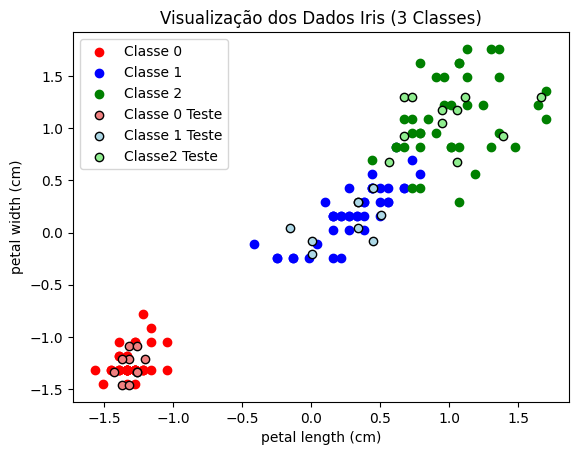

In [14]:
'''Vamos plotar os pontos que temos e conhecemos de forma associada a sua respectiva classe para compararmos com a melhor previsão do kmeans'''

plt.scatter(dados_train[y_train == 0][:, 0], dados_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(dados_train[y_train == 1][:, 0], dados_train[y_train == 1][:, 1], color='blue', label='Classe 1') # parametro 0 e 1 = length e width petal
plt.scatter(dados_train[y_train == 2][:, 0], dados_train[y_train == 2][:, 1], color='green', label='Classe 2') # parametro 0 e 1 = length e width petal

# Plot dos dados de teste
plt.scatter(dados_test[y_test == 0][:, 0], dados_test[y_test == 0][:, 1], color='lightcoral', label='Classe 0 Teste', edgecolor='k')
plt.scatter(dados_test[y_test == 1][:, 0], dados_test[y_test == 1][:, 1], color='lightblue', label='Classe 1 Teste', edgecolor='k')
plt.scatter(dados_test[y_test == 2][:, 0], dados_test[y_test == 2][:, 1], color='lightgreen', label='Classe2 Teste', edgecolor='k')

plt.xlabel(f'{iris.feature_names[2]}') # iris.feature_name[0] nos da o nome do parametro 0 = sepal length
plt.ylabel(f'{iris.feature_names[3]}') # iris.feature_name[1] nos da o nome do parametro 1 = sepal width
plt.title('Visualização dos Dados Iris (3 Classes)')
plt.legend()
plt.show()

In [15]:
def random_points(matriz_de_dados,k): # função para selecionar k pontos de forma aleatória pertencentes a uma matriz de dados. Cada linha representa um conjunto de dados
  pontos = []
  for i in range(k):
    coordenada = int(len(matriz_de_dados)*np.random.random())
    pontos.append(matriz_de_dados[coordenada])
  return pontos # nos retorna uma matriz com todos os pontos aleatórios que foram selecionados

def distancia_euclidiana(ponto1,ponto2): # mede a distância euclidiana entre dois pontos de 2 coordenadas
  x = ponto1[0]-ponto2[0]
  y = ponto1[1]-ponto2[1]
  return np.sqrt(x**2 + y**2)


In [17]:
variancias = [] # as variancias e os números aleatórios é a única coisa que nos interessa manter após rodar todo o código
pontos_aleatorios = []
for p in range(10): # geraremos 3 coordenadas aleatórias 10 vezes
  '''Abaixo temos o passo 3'''
  pontos_selecionados = random_points(dados_train,3)
  pontos_aleatorios.append([pontos_selecionados[0][0],pontos_selecionados[0][1]])
  pontos_aleatorios.append([pontos_selecionados[1][0],pontos_selecionados[1][1]])
  pontos_aleatorios.append([pontos_selecionados[2][0],pontos_selecionados[2][1]])
  grupo1 = []
  grupo2 = []
  grupo3 = []
  for i in range(len(dados_train)):
    distancias = []
    for j in range(3):
      distancias.append(distancia_euclidiana(pontos_selecionados[j],dados_train[i]))
    if distancias[0] < distancias[1] and distancias[0] < distancias[2]:
      grupo1.append([dados_train[i][0],dados_train[i][1]]) # np.append(dados_train[i]) adicionaria varias array dentro da matriz de distancias, queremos apenas os números
    elif distancias[1] < distancias[0] and distancias[1] < distancias[2]:
      grupo2.append([dados_train[i][0],dados_train[i][1]])
    else:
      grupo3.append([dados_train[i][0],dados_train[i][1]])

  grupo1 = np.array(grupo1) # só estamos tranformando nossa 'lists' em arrays para manipulá-las como números na hora de plotar os gráficos
  grupo2 = np.array(grupo2)
  grupo3 = np.array(grupo3)
  '''Calculando os pontos médios'''
  pontos_medios = [] # a primeira linha dessa array terá os pontos médios do grupo1, a segunda, do grupo2 e a terceira, do grupo3

  pontos_medios.append([np.mean(grupo1[:, 0]),np.mean(grupo1[:, 1])]) # pontos médios, grupo 1
  pontos_medios.append([np.mean(grupo2[:, 0]),np.mean(grupo2[:, 1])]) # pontos médios, grupo 2
  pontos_medios.append([np.mean(grupo3[:, 0]),np.mean(grupo3[:, 1])]) # pontos médios, grupo 3

  pontos_medios = np.array(pontos_medios) # tranformando em array do numpy para plotar

  ''' O mesmo, para os pontos médios'''
  grupo1 = [] # vamos reutilizar as arrays grupo1, grupo2, grupo3
  grupo2 = []
  grupo3 = []
  for i in range(len(dados_train)):
    distancias = []
    for j in range(3):
      distancias.append(distancia_euclidiana(pontos_medios[j],dados_train[i]))
    if distancias[0] < distancias[1] and distancias[0] < distancias[2]:
      grupo1.append([dados_train[i][0],dados_train[i][1]])
    elif distancias[1] < distancias[0] and distancias[1] < distancias[2]:
      grupo2.append([dados_train[i][0],dados_train[i][1]])
    else:
      grupo3.append([dados_train[i][0],dados_train[i][1]])

  grupo1 = np.array(grupo1)
  grupo2 = np.array(grupo2)
  grupo3 = np.array(grupo3)

  '''Vamos calcular as variâncias e armazená-las junto com os números aleatórios criados'''
  variancias.append([np.var(grupo1),np.var(grupo2),np.var(grupo3)])

In [56]:
# com as variâncias em mãos, escolheremos os pontos aleatórios nos quais gerarm posteriormente as menores variâncias.
# Com isso, o método de avaliação é selecionar aqueles pontos onde possuam o menor valor da soma das variâncias

def indiceMelhorVariancia(variancias): # essa função só funciana para casos onde possuimos apenas 3 classes
  soma_variancias = []
  soma_variancias_ordenadas = []
  for i in range(len(variancias)):
    soma_variancias.append(variancias[i][0] + variancias[i][1] +variancias[i][2])
    soma_variancias_ordenadas.append(variancias[i][0] + variancias[i][1] +variancias[i][2]) # temos de ter essa matriz ordenada para comparar com a matriz da soma das variancias que está associada com os três números aleatórios gerados
  #vamos usar o quicksot para ordenar a matriz e achar o menor valor
  quicksort(soma_variancias_ordenadas, 0, len(soma_variancias_ordenadas)-1)
  for i in range(len(soma_variancias)):
    if soma_variancias_ordenadas[0] == soma_variancias[i]:
      return i

# Com o índice da melhor variância em mãos, conseguimos escolher quais são os melhores três pontos aleatório gerados:
bestIndice = indiceMelhorVariancia(variancias)

# Como temos uma matriz com todos os pontos onde a cada três pontos, temos um índice da matriz de variancias associado, faremos:
melhores_pontos = [pontos_aleatorios[3*bestIndice], pontos_aleatorios[3*bestIndice + 1], pontos_aleatorios[3*bestIndice + 2]] # esses são os pontos aleatório que nos entregaram a menor variância


In [57]:
# Com isso, após rodar diversos pontos aleatórios e descobrir com o melhor, rodaremos esses pontos novamente e plotaremos o gráfico dos pontos e suas classes divididas:
#OBS: deve haver um jeito mais eficiente de fazer tal procedimento sem ter que rodar os pontos novamente, mas vamos se ater à lógica básica primeiro

grupo1 = []
grupo2 = []
grupo3 = []
for i in range(len(dados_train)):
  distancias = []
  for j in range(3):
    distancias.append(distancia_euclidiana(melhores_pontos[j],dados_train[i]))
  if distancias[0] < distancias[1] and distancias[0] < distancias[2]:
    grupo1.append([dados_train[i][0],dados_train[i][1]]) # np.append(dados_train[i]) adicionaria varias array dentro da matriz de distancias, queremos apenas os números
  elif distancias[1] < distancias[0] and distancias[1] < distancias[2]:
    grupo2.append([dados_train[i][0],dados_train[i][1]])
  else:
    grupo3.append([dados_train[i][0],dados_train[i][1]])

grupo1 = np.array(grupo1)
grupo2 = np.array(grupo2)
grupo3 = np.array(grupo3)
'''Calculando os pontos médios'''
pontos_medios = [] # a primeira linha dessa array terá os pontos médios do grupo1, a segunda, do grupo2 e a terceira, do grupo3

pontos_medios.append([np.mean(grupo1[:, 0]),np.mean(grupo1[:, 1])]) # pontos médios, grupo 1
pontos_medios.append([np.mean(grupo2[:, 0]),np.mean(grupo2[:, 1])]) # pontos médios, grupo 2
pontos_medios.append([np.mean(grupo3[:, 0]),np.mean(grupo3[:, 1])]) # pontos médios, grupo 3

pontos_medios = np.array(pontos_medios) # tranformando em array do numpy para plotar

''' O mesmo, para os pontos médios'''
grupo1 = [] # vamos reutilizar as arrays grupo1, grupo2, grupo3
grupo2 = []
grupo3 = []
for i in range(len(dados_train)):
  distancias = []
  for j in range(3):
    distancias.append(distancia_euclidiana(pontos_medios[j],dados_train[i]))
  if distancias[0] < distancias[1] and distancias[0] < distancias[2]:
    grupo1.append([dados_train[i][0],dados_train[i][1]])
  elif distancias[1] < distancias[0] and distancias[1] < distancias[2]:
    grupo2.append([dados_train[i][0],dados_train[i][1]])
  else:
    grupo3.append([dados_train[i][0],dados_train[i][1]])

grupo1 = np.array(grupo1)
grupo2 = np.array(grupo2)
grupo3 = np.array(grupo3)

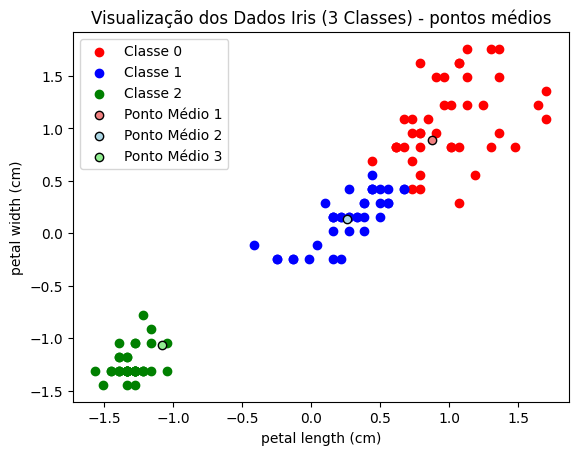

In [58]:
''' Plotando nosso melhore resultado'''
plt.scatter(grupo1[:, 0], grupo1[:, 1], color='red', label='Classe 0')
plt.scatter(grupo2[:, 0], grupo2[:, 1], color='blue', label='Classe 1')
plt.scatter(grupo3[:, 0], grupo3[:, 1], color='green', label='Classe 2')

# Plot dos PONTOS MEDIOS
plt.scatter(pontos_medios[0][0], pontos_medios[0][1], color='lightcoral', label='Ponto Médio 1', edgecolor='k')
plt.scatter(pontos_medios[1][0], pontos_medios[1][1], color='lightblue', label='Ponto Médio 2', edgecolor='k')
plt.scatter(pontos_medios[2][0], pontos_medios[2][1], color='lightgreen', label='Ponto Médio 3', edgecolor='k')

plt.xlabel(f'{iris.feature_names[2]}')
plt.ylabel(f'{iris.feature_names[3]}')
plt.title('Visualização dos Dados Iris (3 Classes) - pontos selecionados')
plt.legend()
plt.show()